In [ ]:
!pip install cirq
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.6/594.6 kB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 kB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.4/223.4 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 k

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.7/129.7 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 9.8 MB/s eta 0:00:00
  Created wheel for qiskit: filename=qiskit-0.42.1-py3-n

In [ ]:
%matplotlib inline

import pickle
import copy
import time
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import networkx as nx

import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve,auc,roc_auc_score

# GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid.
# Stratified K-Folds cross-validator. Provides train/test indices to split data in train/test sets
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

# from quantum_random_forest import QuantumRandomForest, set_multiprocessing

In [ ]:
df = pd.read_csv('./data/twitch_final_dataset.csv')

# To  remove"Unnamed: 0" column
df = df.drop(columns=['Unnamed: 0'])
df

,Source,Destination,Class,Page_Rank_Src,Page_Rank_Dst,Shortest_Path,Follows_Back,Followers_Src,Followees_Src,Followers_Dst,Followees_Dst,Int_Followers,Int_Followees,Preattach_Src,Preattach_Dst
0,6194,255,1,0.000013,0.000021,-1,0,0,3,0,4,0,0,3,4
1,6194,980,1,0.000013,0.000035,-1,0,0,3,0,15,0,1,3,15
2,6194,2992,1,0.000013,0.000014,4,0,0,3,3,0,0,0,3,3
3,6194,2507,1,0.000013,0.000019,3,0,0,3,8,14,0,0,3,22
4,6194,986,1,0.000013,0.000014,-1,0,0,3,0,19,0,0,3,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70643,15120,47969,0,0.000019,0.000027,-1,0,0,0,0,0,0,0,0,0
70644,27161,51743,0,0.000010,0.000012,-1,0,0,1,0,0,0,0,1,0
70645,1829,13701,0,0.000019,0.000021,-1,0,1,1,0,0,0,0,2,0
70646,7168,8823,0,0.000010,0.000019,-1,0,0,0,0,0,0,0,0,0


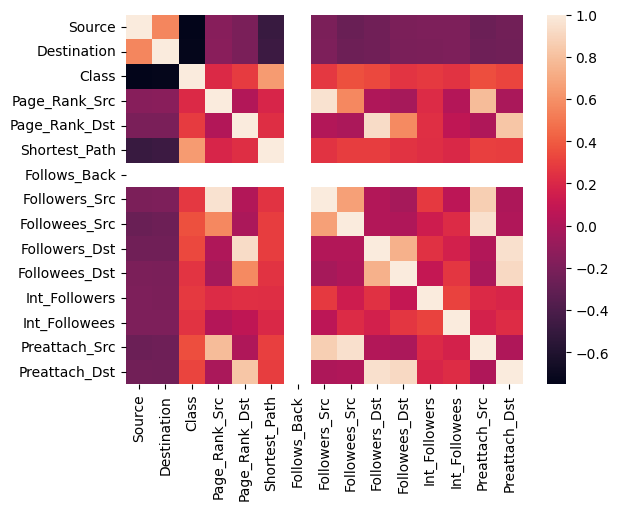

In [ ]:
dataplot=sn.heatmap(df.corr())
plt.show()

<Axes: xlabel='Page_Rank_Src'>

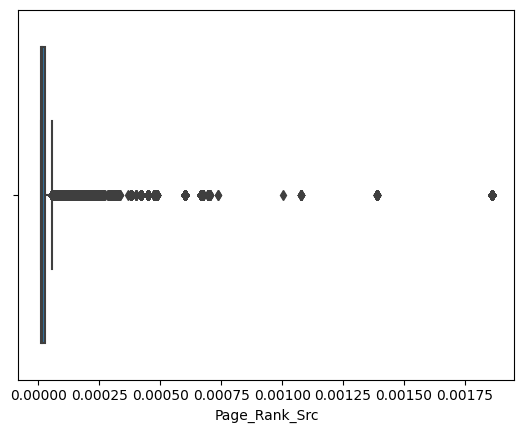

In [ ]:
sn.boxplot(x="Page_Rank_Src", data=df)

<Axes: >

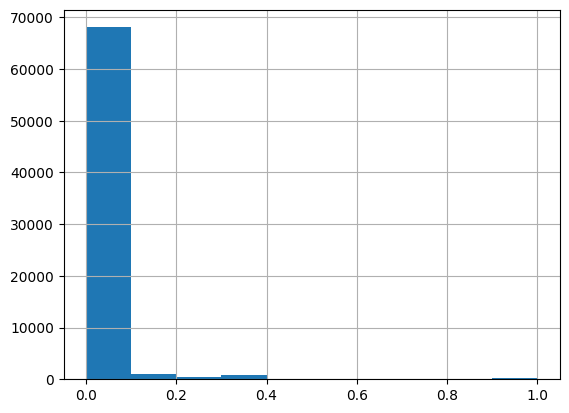

In [ ]:
x = df['Page_Rank_Src']
df['Page_Rank_Src'] = ( x-x.min()) / ( x.max() - x.min() )  #normalise data in the range 0-1
df['Page_Rank_Src'].hist() # matplotlib library  used to plot a histogram

<Axes: xlabel='Page_Rank_Dst'>

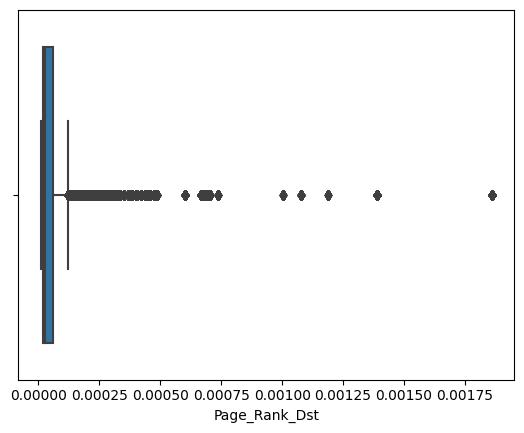

In [ ]:
sn.boxplot(x="Page_Rank_Dst", data=df)

<Axes: >

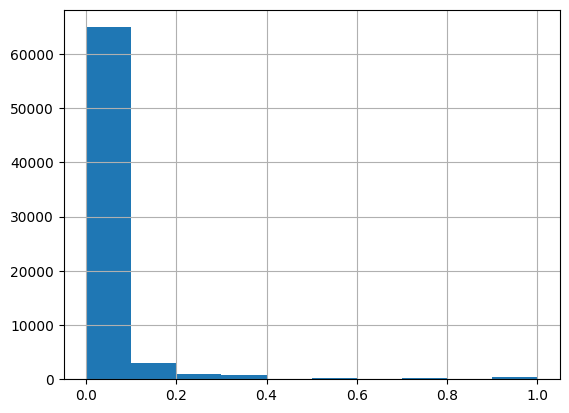

In [ ]:
x = df['Page_Rank_Dst']
df['Page_Rank_Dst'] = ( x-x.min()) / ( x.max() - x.min() )
df['Page_Rank_Dst'].hist()

<Axes: xlabel='Shortest_Path'>

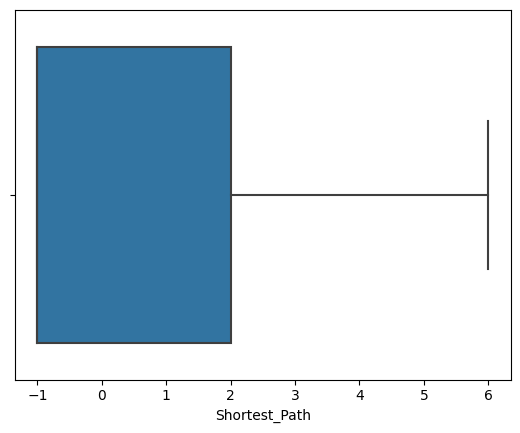

In [ ]:
sn.boxplot(x="Shortest_Path", data=df)

<Axes: >

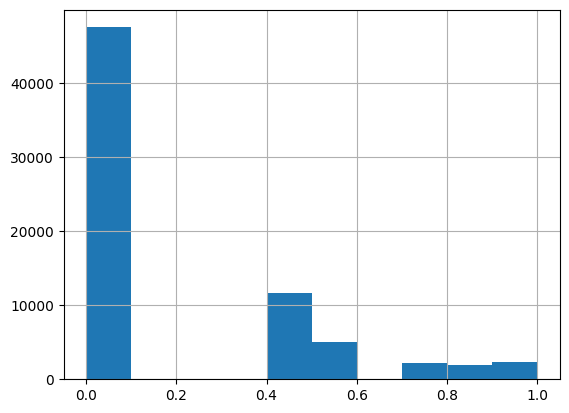

In [ ]:
x = df['Shortest_Path']
df['Shortest_Path'] = ( x-x.min()) / ( x.max() - x.min() )
df['Shortest_Path'].hist()

<Axes: xlabel='Follows_Back'>

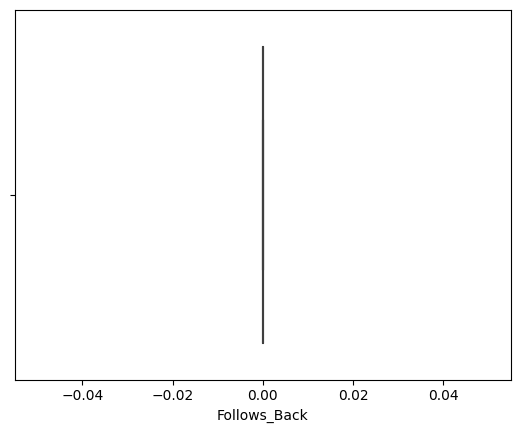

In [ ]:
sn.boxplot(x="Follows_Back", data=df)

<Axes: >

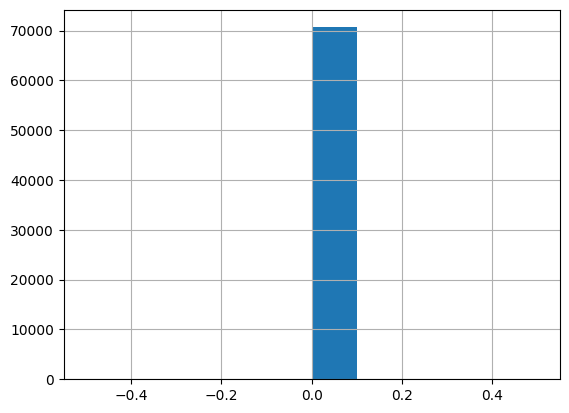

In [ ]:
x = df['Follows_Back']
if x.max() != x.min():
    df['Follows_Back'] = ( x-x.min()) / ( x.max() - x.min() )
df['Follows_Back'].hist()

<Axes: xlabel='Followees_Dst'>

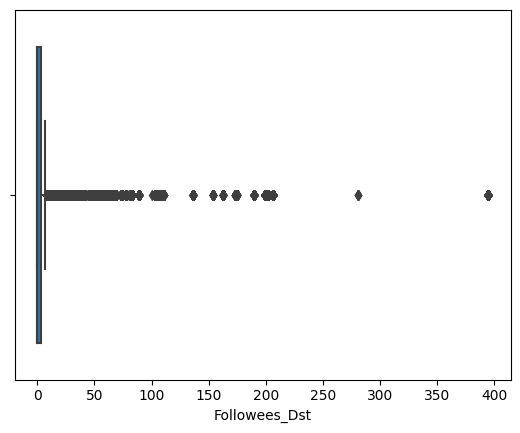

In [ ]:
sn.boxplot(x="Followees_Dst", data=df)

<Axes: >

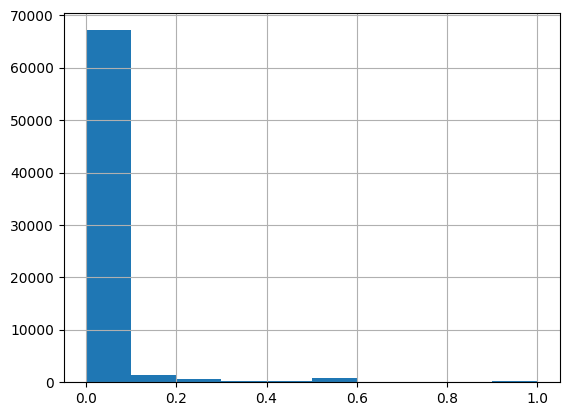

In [ ]:
x = df['Followees_Dst']
df['Followees_Dst'] = ( x-x.min()) / ( x.max() - x.min() )
df['Followees_Dst'].hist()

<Axes: xlabel='Followees_Src'>

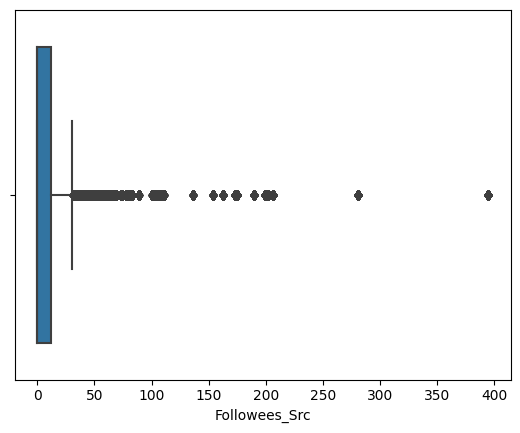

In [ ]:
sn.boxplot(x="Followees_Src", data=df)

<Axes: >

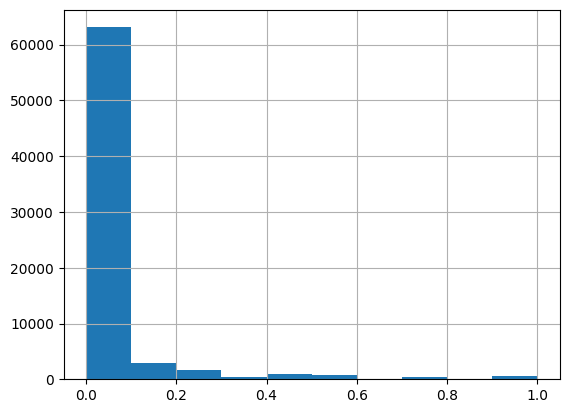

In [ ]:
x = df['Followees_Src']
df['Followees_Src'] = ( x-x.min()) / ( x.max() - x.min() )
df['Followees_Src'].hist()

<Axes: xlabel='Followers_Dst'>

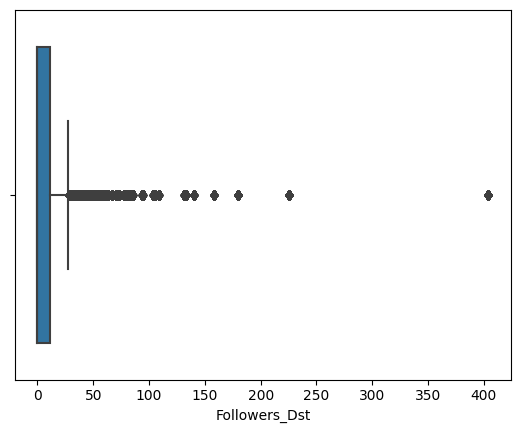

In [ ]:
sn.boxplot(x="Followers_Dst", data=df)

<Axes: >

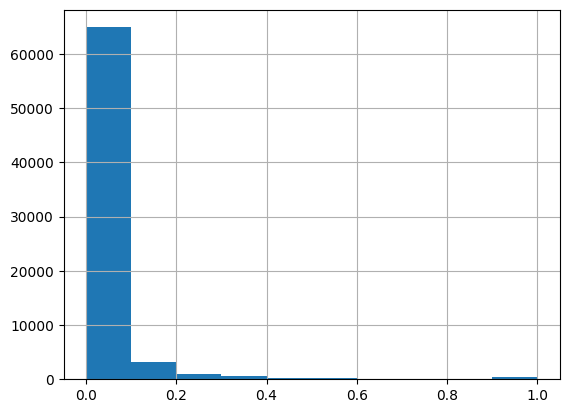

In [ ]:
x = df['Followers_Dst']
df['Followers_Dst'] = ( x-x.min()) / ( x.max() - x.min() )
df['Followers_Dst'].hist()

<Axes: xlabel='Followers_Src'>

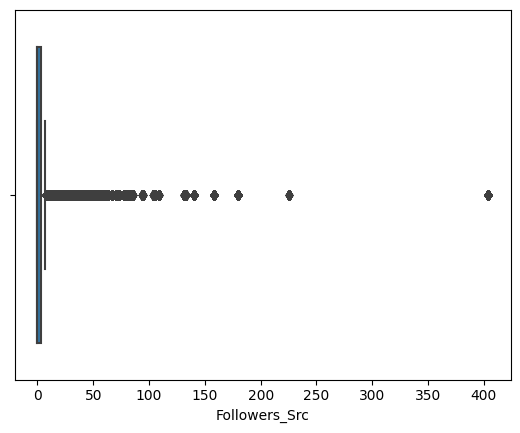

In [ ]:
sn.boxplot(x="Followers_Src", data=df)

<Axes: >

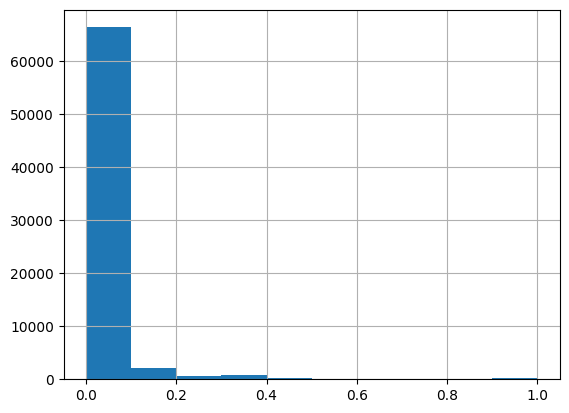

In [ ]:
x = df['Followers_Src']
df['Followers_Src'] = ( x-x.min()) / ( x.max() - x.min() )
df['Followers_Src'].hist()

<Axes: xlabel='Int_Followees'>

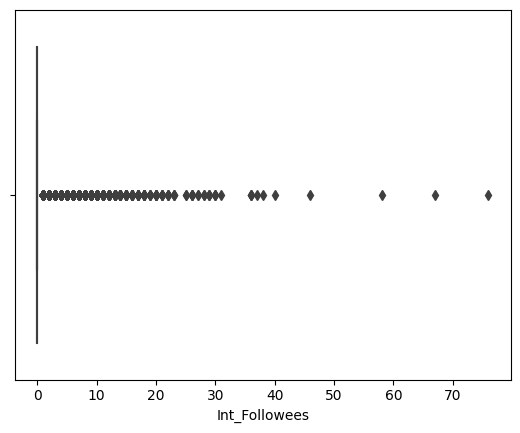

In [ ]:
sn.boxplot(x="Int_Followees", data=df)

<Axes: >

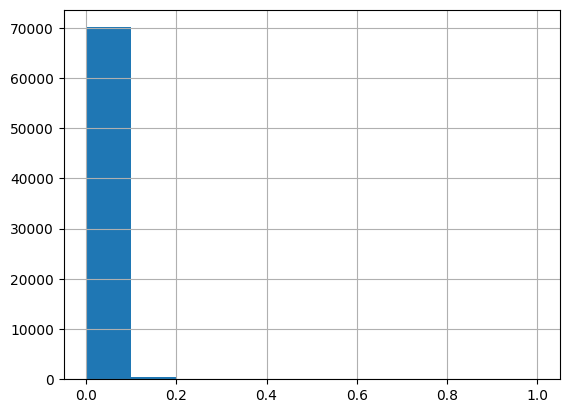

In [ ]:
x = df['Int_Followees']
df['Int_Followees'] = ( x-x.min()) / ( x.max() - x.min() )
df['Int_Followees'].hist()

<Axes: xlabel='Int_Followers'>

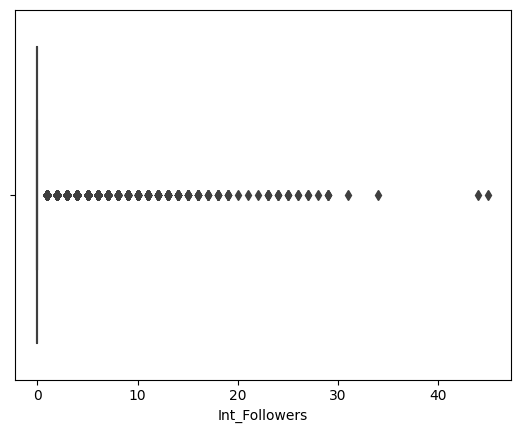

In [ ]:
sn.boxplot(x="Int_Followers", data=df)

<Axes: >

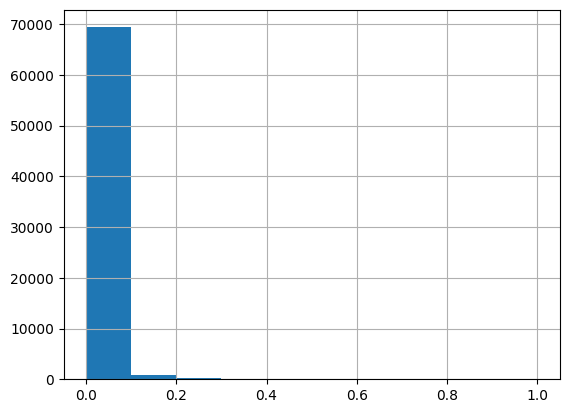

In [ ]:
x = df['Int_Followers']
df['Int_Followers'] = ( x-x.min()) / ( x.max() - x.min() )
df['Int_Followers'].hist()

<Axes: xlabel='Preattach_Src'>

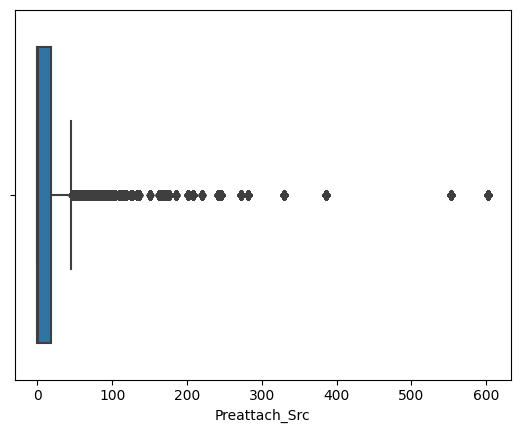

In [ ]:
sn.boxplot(x="Preattach_Src", data=df)

<Axes: >

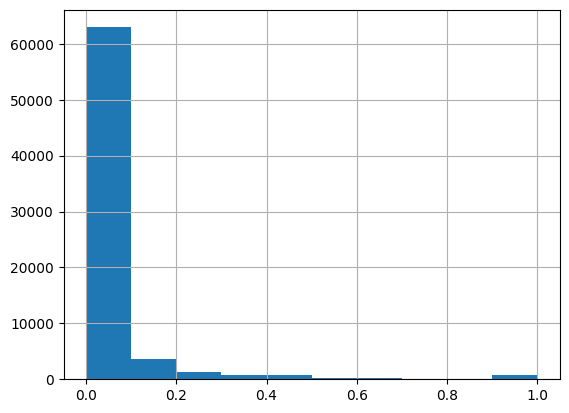

In [ ]:
x = df['Preattach_Src']
df['Preattach_Src'] = ( x-x.min()) / ( x.max() - x.min() )
df['Preattach_Src'].hist()

<Axes: xlabel='Preattach_Dst'>

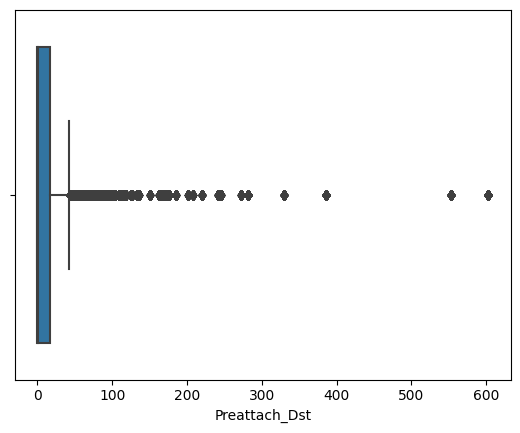

In [ ]:
sn.boxplot(x="Preattach_Dst", data=df)

<Axes: >

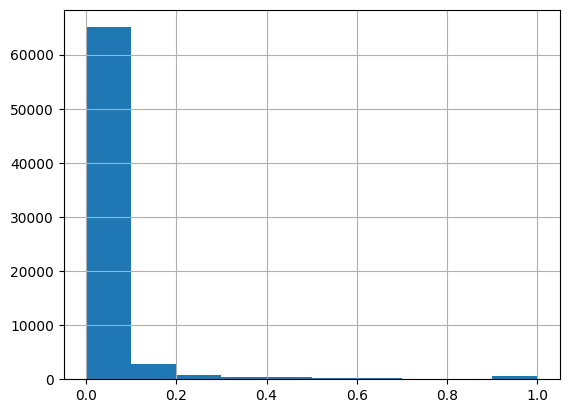

In [ ]:
x = df['Preattach_Dst']
df['Preattach_Dst'] = ( x-x.min()) / ( x.max() - x.min() )
df['Preattach_Dst'].hist()

In [ ]:
df

,Source,Destination,Class,Page_Rank_Src,Page_Rank_Dst,Shortest_Path,Follows_Back,Followers_Src,Followees_Src,Followers_Dst,Followees_Dst,Int_Followers,Int_Followees,Preattach_Src,Preattach_Dst
0,6194,255,1,0.001696,0.005685,0.000000,0,0.000000,0.007595,0.000000,0.010127,0.0,0.000000,0.004975,0.006633
1,6194,980,1,0.001696,0.013433,0.000000,0,0.000000,0.007595,0.000000,0.037975,0.0,0.013158,0.004975,0.024876
2,6194,2992,1,0.001696,0.002103,0.714286,0,0.000000,0.007595,0.007426,0.000000,0.0,0.000000,0.004975,0.004975
3,6194,2507,1,0.001696,0.004922,0.571429,0,0.000000,0.007595,0.019802,0.035443,0.0,0.000000,0.004975,0.036484
4,6194,986,1,0.001696,0.002097,0.000000,0,0.000000,0.007595,0.000000,0.048101,0.0,0.000000,0.004975,0.031509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70643,15120,47969,0,0.004696,0.008844,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
70644,27161,51743,0,0.000000,0.001144,0.000000,0,0.000000,0.002532,0.000000,0.000000,0.0,0.000000,0.001658,0.000000
70645,1829,13701,0,0.004931,0.005960,0.000000,0,0.002475,0.002532,0.000000,0.000000,0.0,0.000000,0.003317,0.000000
70646,7168,8823,0,0.000000,0.004665,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [ ]:
df.to_csv('./data/twitch_preprocessed_data.csv')

In [ ]:
g = nx.from_pandas_edgelist(df[['Source','Destination']], source='Source', target='Destination',create_using=nx.DiGraph())
print (nx.info(g))

DiGraph with 50119 nodes and 70648 edges


In [ ]:
df_x = df.drop(columns=['Source', 'Destination', 'Class'])
df_y = df[['Class']]
x_train, x_test, y_train, y_test  = train_test_split(df_x, df_y, test_size = 0.3, random_state=7)

In [ ]:
train_data = pd.DataFrame(zip(x_train, y_train), columns=['x', 'y'])
test_data = pd.DataFrame(zip(x_test, y_test), columns=['x', 'y'])
train_data

,x,y
0,Page_Rank_Src,Class


In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)


## 1. Logistic Regression

In [ ]:
#L1 regularization penalizes the sum of absolute values of the weights, whereas L2 regularization penalizes the sum of squares of the weights
penalty_values = ['l1', 'l2']
c_values = np.logspace(0, 4, 10)
param_grid = {'C' : c_values, 'penalty' : penalty_values}

gs_lr = GridSearchCV(cv = 10, estimator = LogisticRegression(), param_grid = param_grid)

In [ ]:
start = time.time()
gs_lr.fit(x_train, y_train) #fitting the model for grid search
end = time.time()
print ('Time taken to train model : ', round(end-start,2) , ' seconds')

Time taken to train model :  53.98  seconds


In [ ]:
pickle.dump(gs_lr.best_estimator_, open('./data/twitch_lr_model.p', 'wb'))
print (gs_lr.best_params_) # print best parameter after tuning

{'C': 3593.813663804626, 'penalty': 'l2'}


In [ ]:
lr_best = gs_lr.best_estimator_
lr_best

LogisticRegression(C=3593.813663804626)

In [ ]:
lr_probs=gs_lr.predict_proba(x_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))

Logistic Regression: ROC AUC=0.988


In [ ]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)


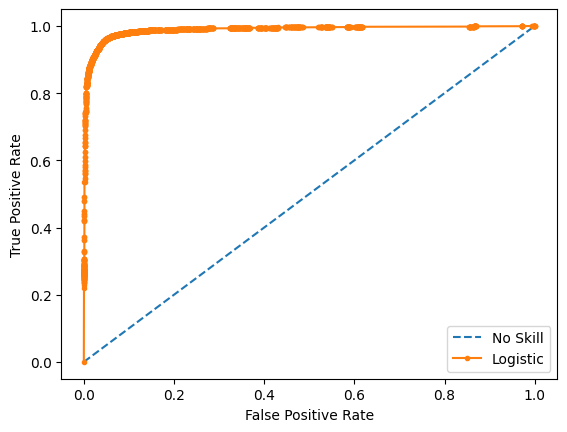

In [ ]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

In [ ]:
print (classification_report(gs_lr.best_estimator_.predict(x_test), y_test) )

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     11198
           1       0.91      0.97      0.94      9997

    accuracy                           0.94     21195
   macro avg       0.94      0.95      0.94     21195
weighted avg       0.95      0.94      0.94     21195



In [ ]:
print (confusion_matrix(gs_lr.best_estimator_.predict(x_test), y_test) )

[[10266   932]
 [  254  9743]]


## 2. Random Forest

In [ ]:
estimators = [50, 100, 150]
depths = [9, 12, 15, 24]
split = np.random.randint(100, 150, 2)
leaves = np.random.randint(20, 30, 2)
param_grid = {'n_estimators' : estimators, 'max_depth' : depths, 'min_samples_split' : split, 'min_samples_leaf' : leaves}

gs_rf = GridSearchCV(cv = 10, estimator = RandomForestClassifier(), param_grid = param_grid)

In [ ]:
start = time.time()
gs_rf.fit(x_train, y_train)
end = time.time()
print("Time taken to train model : ", round(end-start,2) , ' seconds')

Time taken to train model :  1627.68  seconds


In [ ]:
pickle.dump(gs_rf.best_estimator_, open('./data/twitch_rf_model.p', 'wb'))
print (gs_rf.best_params_)

{'max_depth': 24, 'min_samples_leaf': 23, 'min_samples_split': 132, 'n_estimators': 50}


In [ ]:
rf_best = gs_rf.best_estimator_
rf_best

RandomForestClassifier(max_depth=24, min_samples_leaf=23, min_samples_split=132,
                       n_estimators=50)

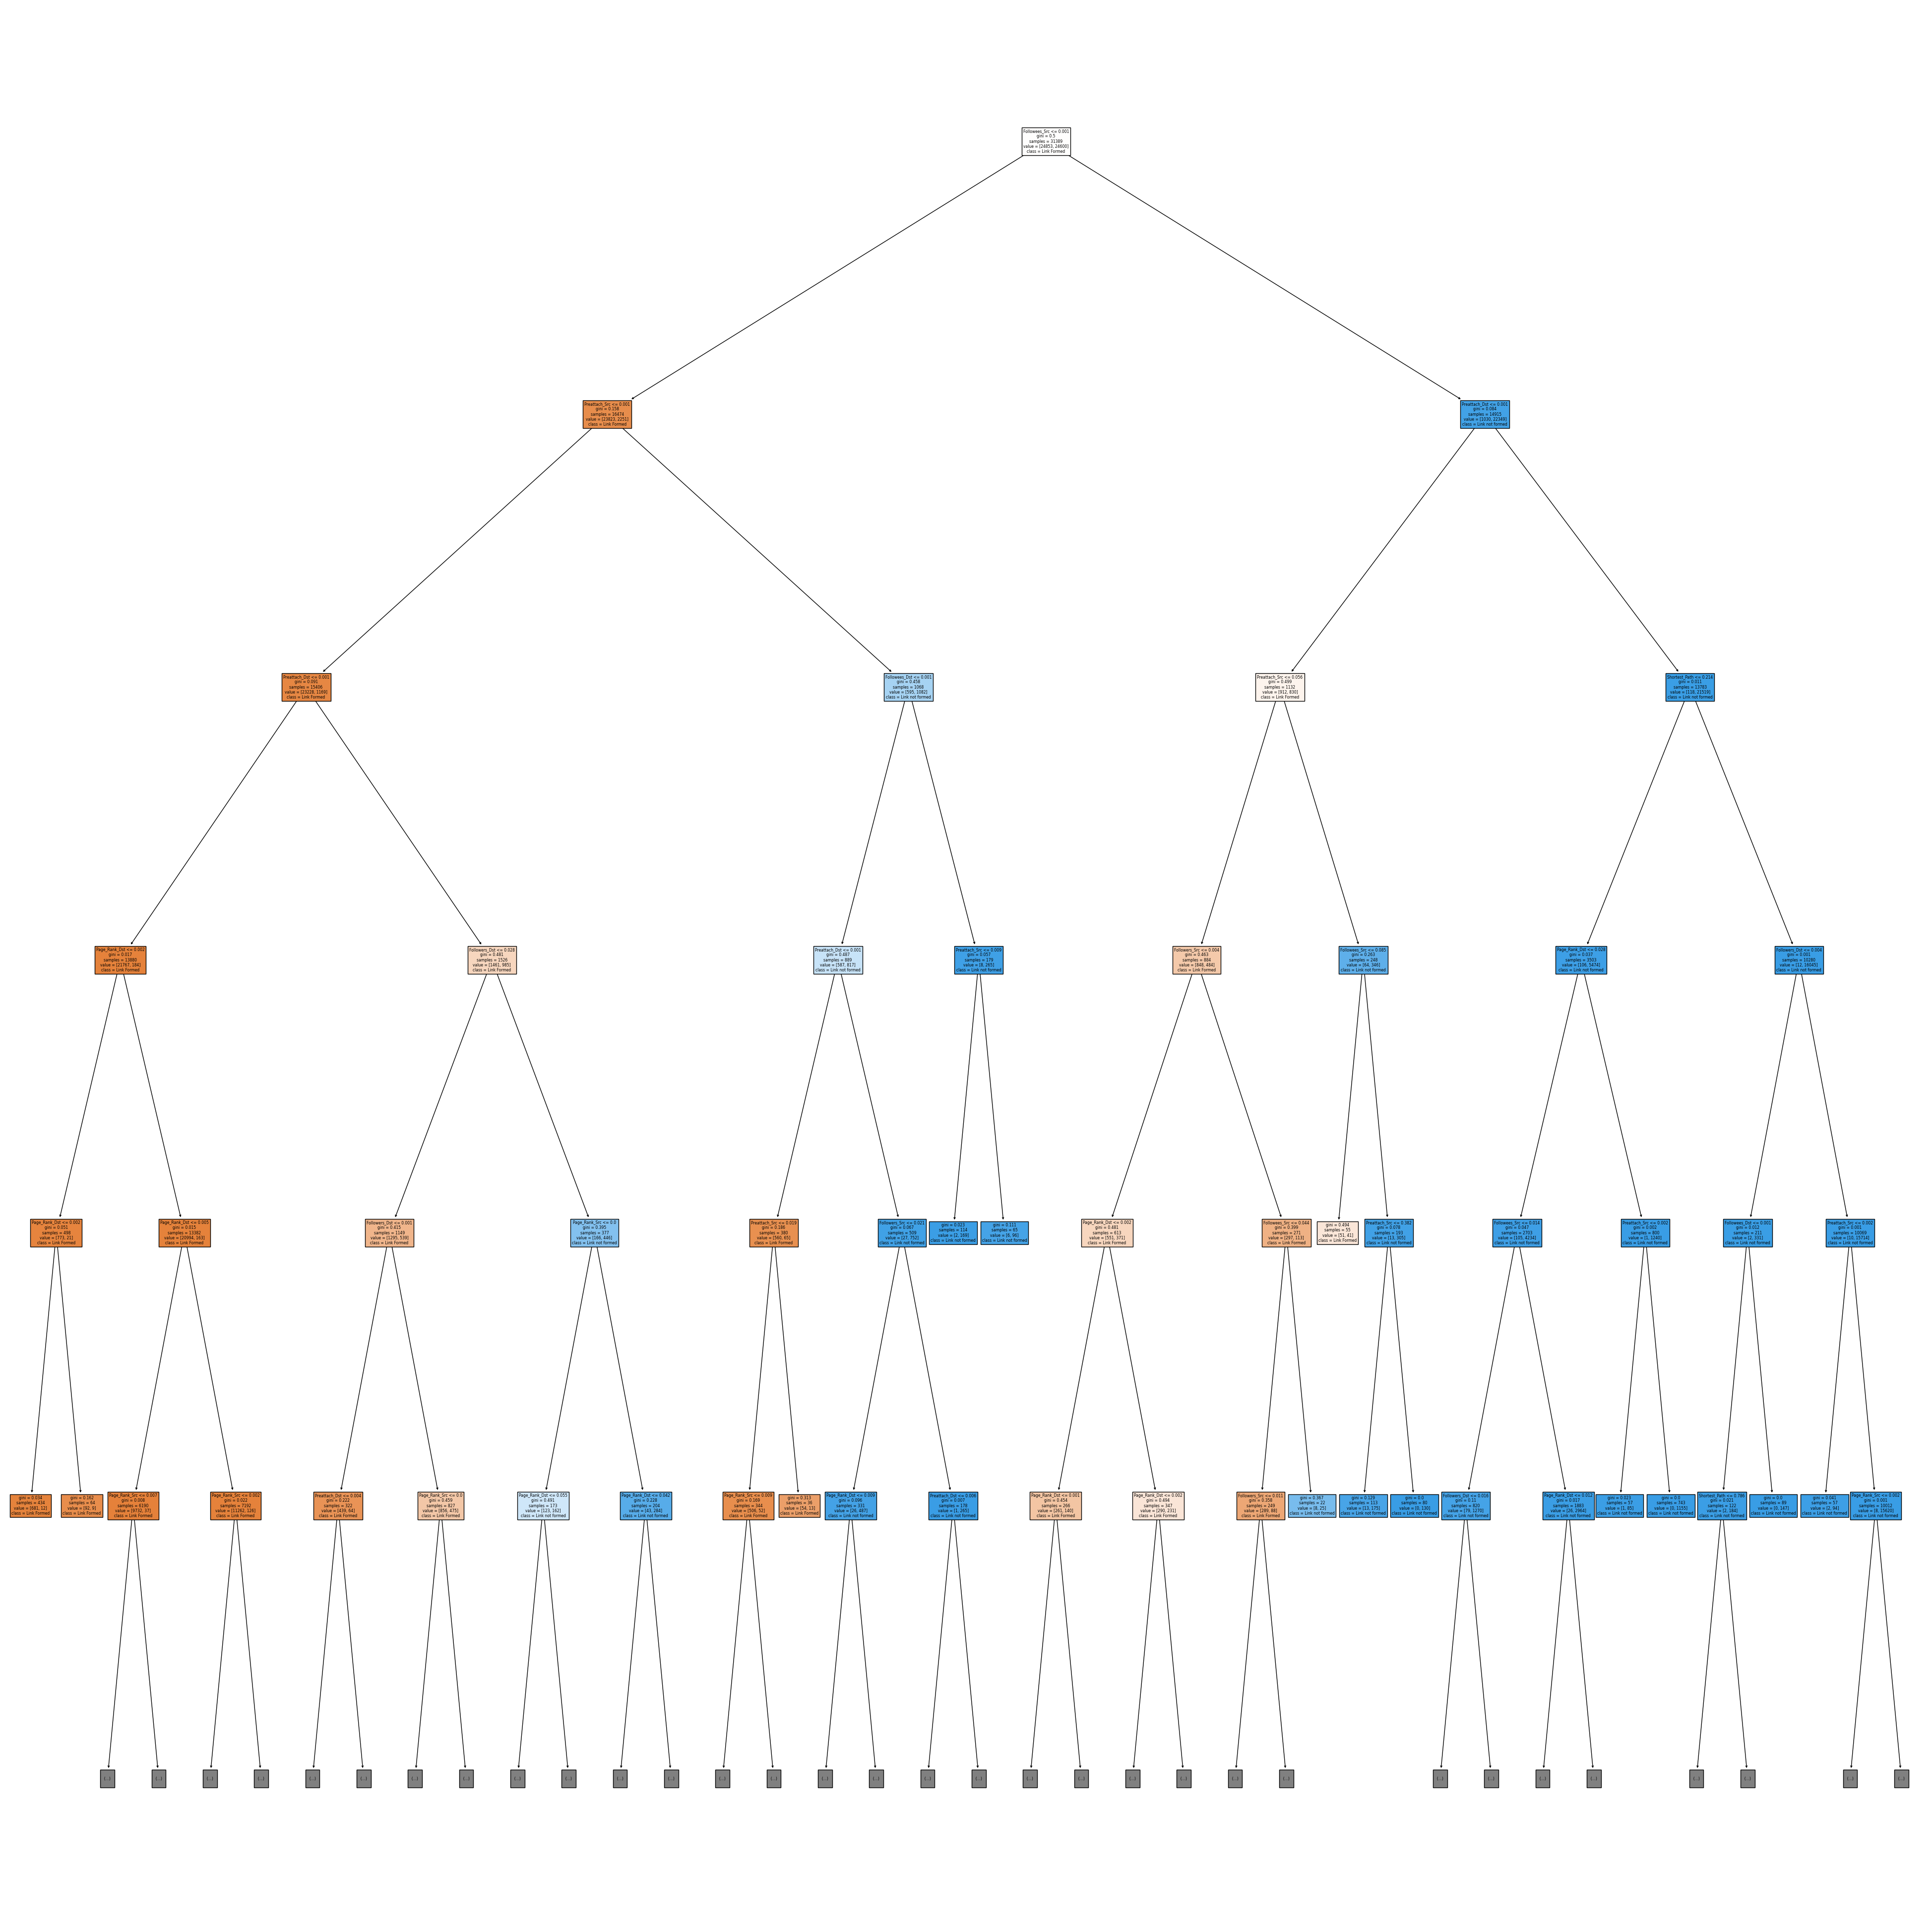

In [ ]:
plt.figure(figsize=(50,50))
plot_tree(rf_best.estimators_[5],max_depth=5, feature_names = df_x.columns,class_names=['Link Formed', "Link not formed"],filled=True);

In [ ]:
rf_best.feature_importances_

array([0.01428275, 0.0306746 , 0.07197988, 0.        , 0.0546554 ,
       0.14508746, 0.16589262, 0.0279726 , 0.00115609, 0.00150988,
       0.24884831, 0.2379404 ])

In [ ]:
imp_df = pd.DataFrame({
    "Feature name": x_train.columns,
    "Importance": rf_best.feature_importances_
})
imp_df.sort_values(by="Importance", ascending=False)

,Feature name,Importance
10,Preattach_Src,0.248848
11,Preattach_Dst,0.237940
6,Followers_Dst,0.165893
5,Followees_Src,0.145087
2,Shortest_Path,0.071980
4,Followers_Src,0.054655
1,Page_Rank_Dst,0.030675
7,Followees_Dst,0.027973
0,Page_Rank_Src,0.014283
9,Int_Followees,0.001510


Text(0.5, 0, 'Importance')

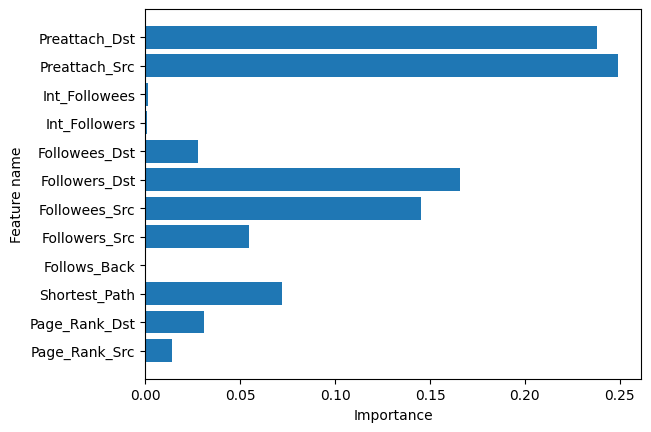

In [ ]:
y=imp_df["Feature name"]
x=imp_df["Importance"]
plt.barh(y, x)
plt.ylabel("Feature name")
plt.xlabel("Importance")

In [ ]:
rf_probs=gs_rf.predict_proba(x_test)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
print('Random Forest: ROC AUC=%.3f' % (rf_auc))

Random Forest: ROC AUC=0.995


In [ ]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

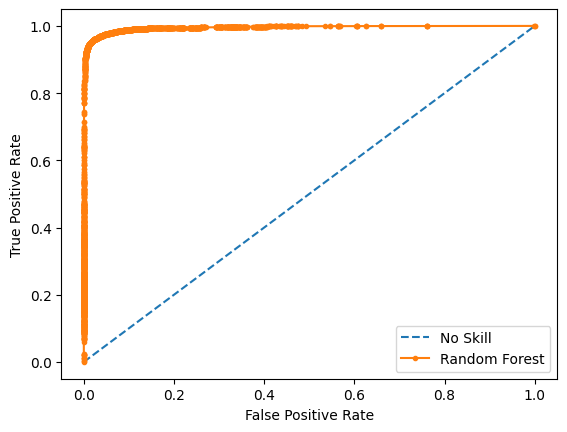

In [ ]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')


# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


# show the legend
plt.legend()


# show the plot
plt.show()

In [ ]:
print (classification_report(gs_rf.best_estimator_.predict(x_test), y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     10764
           1       0.96      0.98      0.97     10431

    accuracy                           0.97     21195
   macro avg       0.97      0.97      0.97     21195
weighted avg       0.97      0.97      0.97     21195



In [ ]:
print (confusion_matrix(gs_rf.best_estimator_.predict(x_test), y_test))

[[10305   459]
 [  215 10216]]


## 3. SVM

In [ ]:
kernels = ['rbf', 'linear']
c_values = [0.001, 0.01, 0.1, 1]
param_grid = {'kernel':kernels, 'C':c_values}
SVM = svm.SVC(probability=True)
gs_svm = GridSearchCV(cv=10, estimator=SVM, param_grid=param_grid)

In [ ]:
start = time.time()
gs_svm.fit(x_train, y_train)
end = time.time()
print ('Time taken to train model : ', round(end-start,2) , ' seconds')

Time taken to train model :  16043.98  seconds


In [ ]:
pickle.dump(gs_svm.best_estimator_, open('./data/twitch_svm_model.p', 'wb'))
print(gs_svm.best_params_)

{'C': 1, 'kernel': 'rbf'}


In [ ]:
svm_best = gs_svm.best_estimator_
svm_best

SVC(C=1, probability=True)

In [ ]:
svm_probs=gs_svm.predict_proba(x_test)
svm_probs = svm_probs[:, 1]
svm_auc = roc_auc_score(y_test, svm_probs)
print('SVM: ROC AUC=%.3f' % (svm_auc))

SVM: ROC AUC=0.985


In [ ]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

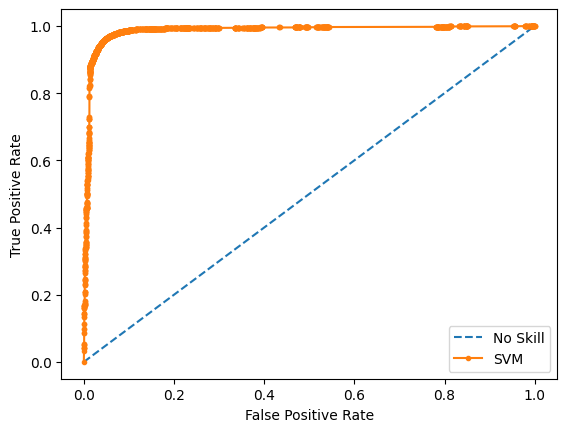

In [ ]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM')


# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


# show the legend
plt.legend()


# show the plot
plt.show()


In [ ]:
print(classification_report(gs_svm.best_estimator_.predict(x_test), y_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     10875
           1       0.94      0.97      0.95     10320

    accuracy                           0.95     21195
   macro avg       0.95      0.95      0.95     21195
weighted avg       0.95      0.95      0.95     21195



In [ ]:
print(confusion_matrix(gs_svm.best_estimator_.predict(x_test), y_test))

[[10184   691]
 [  336  9984]]


# 4.AdaBoost

In [ ]:
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

In [ ]:
model = AdaBoostClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
gs_ab = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')

In [ ]:
start = time.time()
gs_ab.fit(x_train,y_train)
end = time.time()
print('Time taken to train model : ', round(end-start,2) , ' seconds')

Time taken to train model :  2911.85  seconds


In [ ]:
pickle.dump(gs_ab.best_estimator_, open('./data/twitch_ab_model.p', 'wb'))
print(gs_ab.best_params_)

{'learning_rate': 1.0, 'n_estimators': 50}


In [ ]:
ab_best = gs_ab.best_estimator_
ab_best

AdaBoostClassifier()

In [ ]:
ab_probs=gs_ab.predict_proba(x_test)
ab_probs = ab_probs[:, 1]
ab_auc = roc_auc_score(y_test, ab_probs)
print('AdaBoost: ROC AUC=%.3f' % (ab_auc))

AdaBoost: ROC AUC=0.994


In [ ]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
ab_fpr, ab_tpr, _ = roc_curve(y_test, ab_probs)

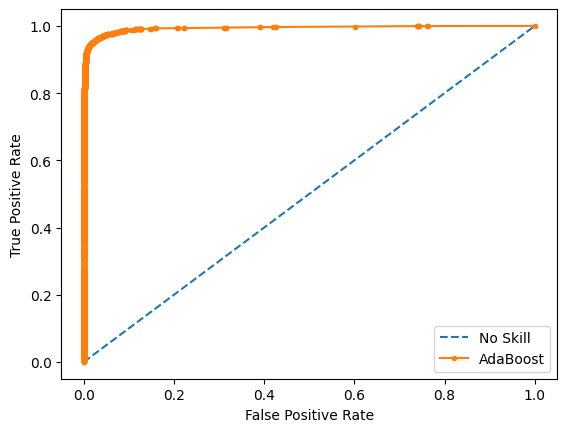

In [ ]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(ab_fpr, ab_tpr, marker='.', label='AdaBoost')


# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


# show the legend
plt.legend()


# show the plot
plt.show()


In [ ]:
print(classification_report(gs_ab.best_estimator_.predict(x_test), y_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     10706
           1       0.96      0.97      0.97     10489

    accuracy                           0.97     21195
   macro avg       0.97      0.97      0.97     21195
weighted avg       0.97      0.97      0.97     21195



In [ ]:
print(confusion_matrix(gs_ab.best_estimator_.predict(x_test), y_test))

[[10250   456]
 [  270 10219]]


# 5. XG Boost

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }


In [ ]:
xgb = XGBClassifier(learning_rate = 0.02, n_estimators = 600, objective = 'binary:logistic', silent = True, nthread = 1)
skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 1001)
gs_xgb = GridSearchCV(xgb, param_grid=params, n_jobs = 4, cv = skf.split(x_train,y_train), verbose=3)


In [ ]:
start = time.time()
gs_xgb.fit(x_train, y_train)
end = time.time()
print('Time taken to train model : ', round(end-start,2) , ' seconds')

Fitting 3 folds for each of 405 candidates, totalling 1215 fits
[13:25:48] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

Time taken to train model :  14093.52  seconds


In [ ]:
pickle.dump(gs_xgb.best_estimator_, open('./data/twitch_xgb_model.p', 'wb'))
print(gs_xgb.best_params_)

{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 5, 'subsample': 0.6}


In [ ]:
xgb_best = gs_xgb.best_estimator_
xgb_best

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=600, n_jobs=None, nthread=1, num_parallel_tree=None,
              predictor=None, ...)

In [ ]:
xgb_probs=gs_xgb.predict_proba(x_test)
xgb_probs = xgb_probs[:, 1]
xgb_auc = roc_auc_score(y_test, xgb_probs)
print('XGBoost: ROC AUC=%.3f' % (xgb_auc))

XGBoost: ROC AUC=0.995


In [ ]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

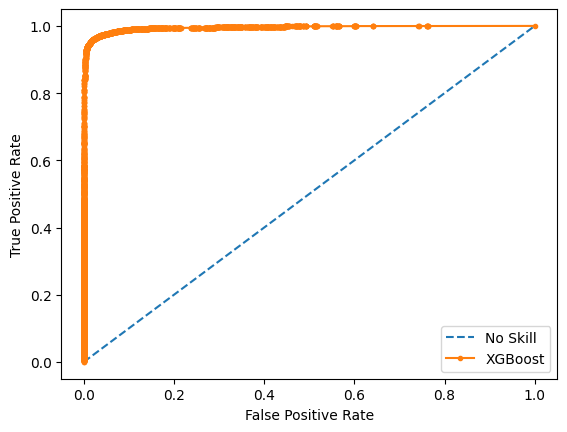

In [ ]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

In [ ]:
print(classification_report(gs_xgb.best_estimator_.predict(x_test), y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     10774
           1       0.96      0.98      0.97     10421

    accuracy                           0.97     21195
   macro avg       0.97      0.97      0.97     21195
weighted avg       0.97      0.97      0.97     21195



In [ ]:
print(confusion_matrix(gs_xgb.best_estimator_.predict(x_test), y_test))

[[10324   450]
 [  196 10225]]
